# Telco customer churn

In [1]:
import pandas as pd
import seaborn as sns


## import data sets

In [28]:
customer = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
customer.shape

(7043, 21)

## Clean Data

In [29]:
#check for NaN distribution
for col in customer.columns:
    percent = customer[col].isnull().sum()/len(customer[col])
    print("%s %.2f"%(col,percent))
#ok seems no NaN found
length = len(customer)
#for those with object dtype check variation >.5
categorical_col = [ i for i in customer.dtypes.index if customer.dtypes[i] =='O']
print('We got %d categorical columns:'%(len(categorical_col)), categorical_col)
for col in categorical_col:
    print("%s :%d/%d"%(col,len(customer[col].unique()),length))

customerID 0.00
gender 0.00
SeniorCitizen 0.00
Partner 0.00
Dependents 0.00
tenure 0.00
PhoneService 0.00
MultipleLines 0.00
InternetService 0.00
OnlineSecurity 0.00
OnlineBackup 0.00
DeviceProtection 0.00
TechSupport 0.00
StreamingTV 0.00
StreamingMovies 0.00
Contract 0.00
PaperlessBilling 0.00
PaymentMethod 0.00
MonthlyCharges 0.00
TotalCharges 0.00
Churn 0.00
We got 18 categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
customerID :7043/7043
gender :2/7043
Partner :2/7043
Dependents :2/7043
PhoneService :2/7043
MultipleLines :3/7043
InternetService :3/7043
OnlineSecurity :3/7043
OnlineBackup :3/7043
DeviceProtection :3/7043
TechSupport :3/7043
StreamingTV :3/7043
StreamingMovies :3/7043
Contract :3/7043
PaperlessBilling :2/7043
PaymentMeth

## Feature selection

In [30]:
#ok we got  customerID obviously useless for training but TotalCharges which should be tranform to numerical
customer = customer.drop(["customerID"], axis=1)
categorical_col.remove("Churn")
categorical_col.remove("customerID")
#can not directly convert TogtalCharges to float32 since it contains space!
#customer['TotalCharges'] = customer['TotalCharges'].astype("float64") <===Error
#Check out that there are some customers that their tenure is 0 but monthly charges is present
#guess that means they are new subscribers. 
#set those customer's TotalCharges to 0
customer.TotalCharges.loc[customer['TotalCharges'].str.isspace()] = 0
#then we can perform convert to float64
customer['TotalCharges'] = customer['TotalCharges'].astype("float64")

#fill these
#for i, tup in enumerate(customer['TotalCharges']):
#    try:
#        customer['TotalCharges'][i] = float(tup)
#    except ValueError:
#        #print("line:%d str:%s"%(i,tup))
#        customer['TotalCharges'][i] = float(0)
#print("finished")
#above tooks too much time
customer.head(10)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Data Visualize

## total charge should be monthly charge multiply with tenure, then we can drop  totalcharges

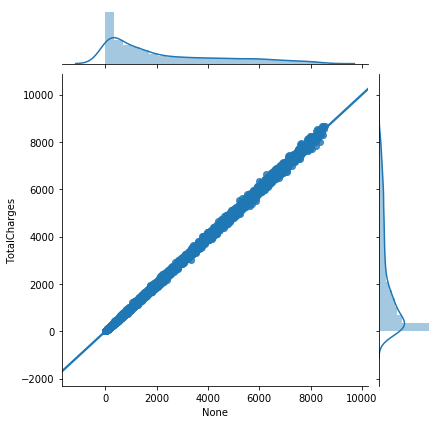

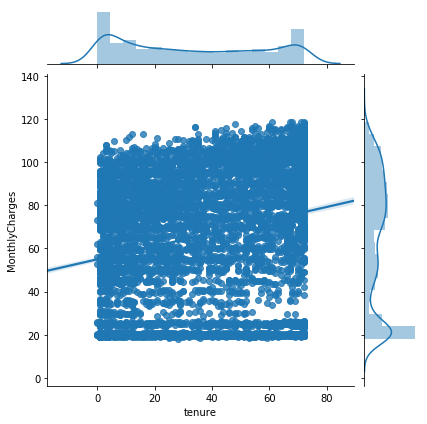

In [31]:
#create a polynomial feature 
features_2_drop = list()
calculated_total = customer.tenure*customer['MonthlyCharges']
sns.jointplot(calculated_total,customer.TotalCharges, kind='reg')
features_2_drop.append('TotalCharges')
categorical_col.remove('TotalCharges')
sns.jointplot(customer.tenure,customer.MonthlyCharges, kind='reg') #seems not obviously related, well keep it.

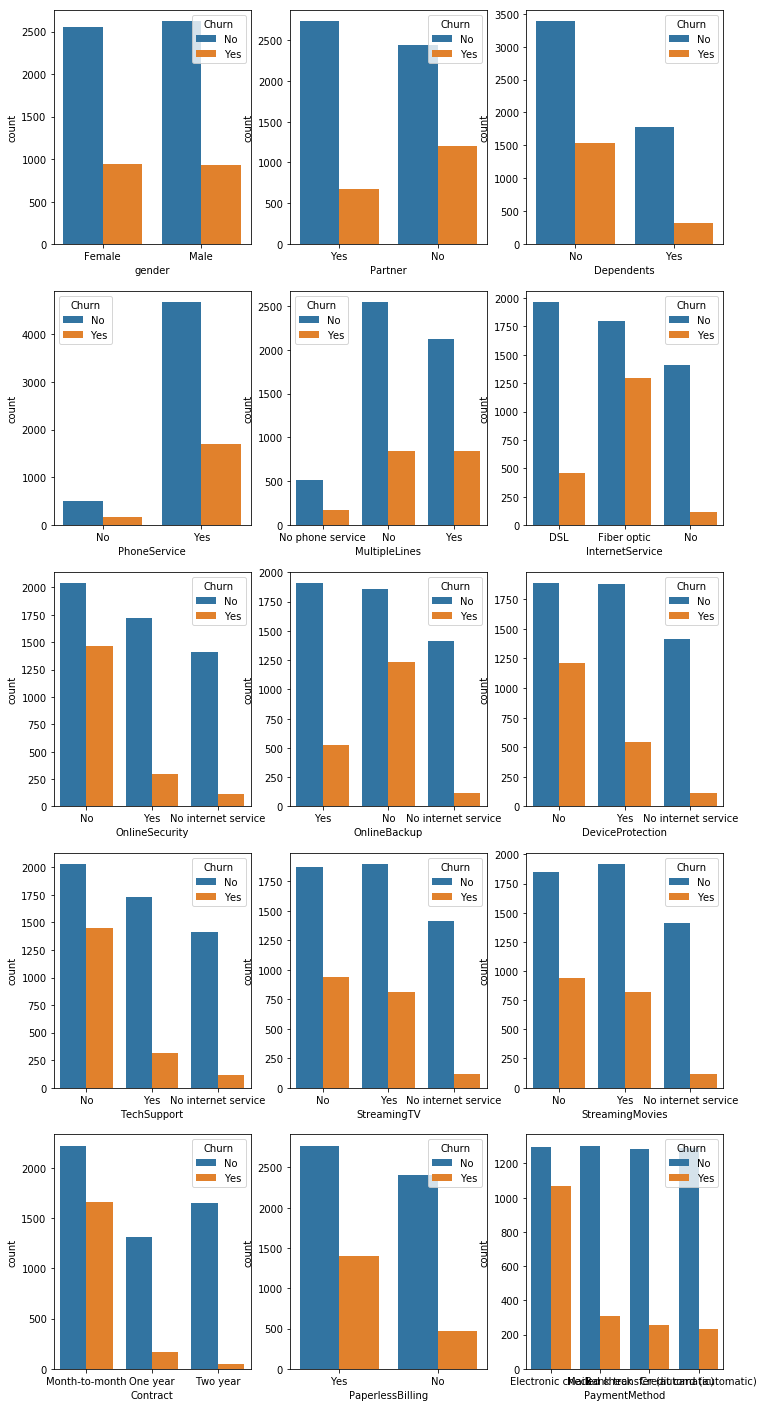

In [32]:
fig , axs = plt.subplots(len(categorical_col)//3,3, figsize=(4*3,5*(len(categorical_col)//3)) )
for i, col in enumerate(categorical_col):
    sns.countplot(x= categorical_col[i], hue= 'Churn',data=customer, ax= axs[i//3][i%3])

In [33]:
## from quick distribution view 
#got some points
#1. Streaming TV and steaming Movies almost identifc
#2. phone service is a subset of multipleLines
#3. online security and online backup are closely related
#4. Internet service relate to Online Securoty& online backup?

## StreamTV and Stream Movies

StreamingTV          StreamingMovies    
No                   No                     2018
                     Yes                     792
No internet service  No internet service    1526
Yes                  No                      767
                     Yes                    1940
Name: gender, dtype: int64


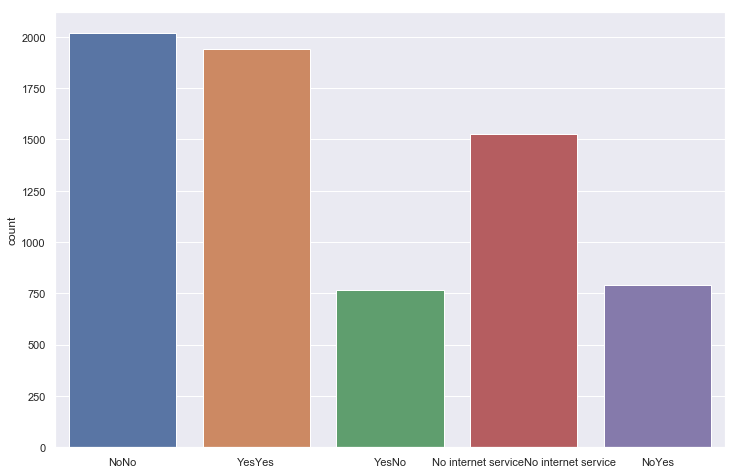

In [86]:
sns.set(style="darkgrid")
stream = customer.groupby(['StreamingTV','StreamingMovies']).count()
print(stream.gender)
#create for countplot
ds = customer.StreamingTV+customer.StreamingMovies
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(ds)
#consider NoYes and YesNo counts for over 1500/7043
#these two columns are not closely dependant

## PhoneService is a subset of MultipleLines

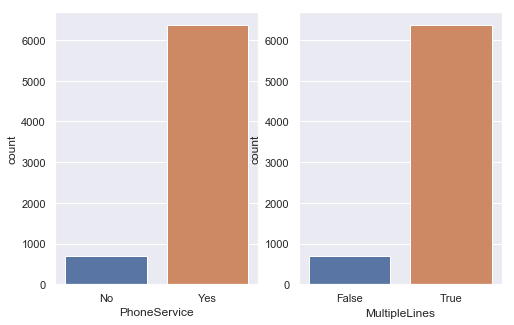

In [87]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2,figsize=(8,5))
sns.countplot(customer.PhoneService, ax=axs[0])
ds = customer['MultipleLines'].isin(['Yes','No'])
sns.countplot(ds, ax=axs[1])
features_2_drop.append('PhoneService')
categorical_col.remove('PhoneService')

In [ ]:
#from quick distribution view 
#got some points
#1. Streaming TV and steaming Movies almost identifcal


In [67]:
filtered_customer = customer.drop(features_2_drop,axis=1)
#filtered_customer = customer

## Do Standard Scaling for numerical cols and one-hot for categorical

In [68]:
#pd.get_dummies(customer)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
filtered_customer[['tenure','MonthlyCharges']] = scaler.fit_transform(filtered_customer[['tenure','MonthlyCharges']])
#rint(customer.head(10))
filtered_customer = pd.get_dummies(filtered_customer)
filtered_customer.head(10)

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,-1.277445,-1.160323,1,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1,0
1,0,0.066327,-0.259629,0,1,1,0,1,0,1,...,1,0,1,0,0,0,0,1,1,0
2,0,-1.236724,-0.362660,0,1,1,0,1,0,1,...,0,0,0,1,0,0,0,1,0,1
3,0,0.514251,-0.746535,0,1,1,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
4,0,-1.236724,0.197365,1,0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
5,0,-0.992402,1.159546,1,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
6,0,-0.422317,0.808907,0,1,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
7,0,-0.910961,-1.163647,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
8,0,-0.177995,1.330711,1,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
9,0,1.206498,-0.286218,0,1,1,0,0,1,1,...,1,0,1,0,1,0,0,0,1,0


## Test-Train split

In [76]:
#customer.info()
from sklearn.model_selection import train_test_split
target = customer.Churn
filtered_customer = filtered_customer.drop('Churn',axis=1)
target = target.map({'No':0,'Yes':1})
trainX, testX,trainY, testY = train_test_split(filtered_customer, target,train_size = 0.8 )

AttributeError: 'DataFrame' object has no attribute 'Churn'

## Try RandomForest model

In [75]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 20,max_depth=10, random_state=0,min_samples_split =5)
clf.fit(trainX, trainY)
clf.score(testX,testY)

1.0

## Try Support Vector Machine

In [72]:
from sklearn.svm import SVC
clf2 = SVC()
clf2.fit(trainX, trainY)
clf2.score(testX,testY)

1.0